# Analysing the Fantasy Premier League

## Introduction
Since the Premier League realesed the Fantasy Football league it has been a great success. And, even though I consider myself a big football, I have never tried playing Fantasy Football. 
So I thought maybe this project can be my chance to dive deeper into how it works, and find strategies that might give me a head start for the next season.

The aim of this project is to analyse the Premier League Fantasy football data to:
* Find the best and worst performers (clubs & footballers)
* Find if there is a correlation between the different variables and the total number of points a player (footballer) earned
* Figure out a strategy to maximise the points earned by a player

## Data
Data will be scrapped from the official Premier League website https://fantasy.premierleague.com/.

All variables will be reviewed to find the ones that have the potential to be beneficial to the analysis and the rest will be removed.

## Premier League Website Terms (Legality of obtaining the data)

As shown in the screenshot below taken from the Terms & Conditions section of the Premier League website. It is mentioned that downloading, using, and sharing the data contained in the website is legal as long as it is for personal use.

![Terms and Conditions](premier_league_terms_and_condition.png)

# Limitations
* Attributes shown in the data are not all-encompassing and there are more variables that must be considered in real life (e.g. injuries, transfers, etc.)
* Attributes are expected to be highly correlated which might cause a multicollinarity issue when building the model
* Prediction model will be beneficial in regards to footballers who transfer to/away from the Premier League

In [1]:
#Importing libraries
from bs4 import BeautifulSoup as bs
import requests as req
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Scrapping the website
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36 Edg/102.0.1245.39",
           "Upgrade-Insecure-Requests":"1",
           "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
           "Accept-Encoding":"gzip, deflate",
           "Accept-Language": "en-US,en;q=0.9"
          }

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
website = req.get(url, headers = headers).text
content = bs(website, 'html.parser')
site_json = json.loads(content.text)

for item in site_json:
    print(item)

events
game_settings
phases
teams
total_players
elements
element_stats
element_types


#### Use the below code block to import data from the exported .json (file incase the website data was changed)

In [ ]:
# #Read from .json file
# with open('plf.json','r') as f:
#     site_json = json.load(f)

# for item in site_json:
#     print(item)

### Transforming data to a pandas DataFrame

In [3]:
#Transforming the main data with all player stats
stats = pd.DataFrame(site_json['elements'])
stats

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,100.0,100.0,80201,0,0,-5,5,1,1,1.0,...,601,60,443,30,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,494,19,545,55,NaN,,NaN,,NaN,
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,...,733,307,733,307,NaN,,NaN,,NaN,
3,0.0,0.0,54694,0,0,-4,4,0,4,0.0,...,61,27,182,33,NaN,,NaN,,NaN,
4,100.0,100.0,58822,0,0,-3,3,1,2,2.2,...,290,87,232,69,2.0,,3.0,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.0,0.0,428610,0,0,0,0,0,3,0.0,...,640,258,658,259,NaN,,NaN,,NaN,
733,NaN,NaN,510362,0,0,-1,1,0,2,-0.6,...,389,145,424,156,NaN,,NaN,,NaN,
734,0.0,0.0,225000,0,0,0,0,0,2,0.0,...,506,194,556,202,NaN,,NaN,,NaN,
735,0.0,0.0,232351,0,0,0,0,0,3,0.0,...,629,253,648,254,NaN,,NaN,,NaN,


In [4]:
#Transforming team data to be able to later join it to the player stats
teams_df = pd.DataFrame(site_json['teams'])
teams_df

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1250,1270,1150,1210,1190,1220,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1090,1100,1140,1110,1090,1090,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,...,None,False,0,1090,1100,1120,1150,1080,1120,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,...,None,False,0,1100,1090,1160,1160,1100,1120,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,...,None,False,0,1060,1060,1080,1130,1060,1100,43
5,8,0,None,6,0,Chelsea,0,0,0,CHE,...,None,False,0,1290,1280,1300,1300,1250,1290,4
6,31,0,None,7,0,Crystal Palace,0,0,0,CRY,...,None,False,0,1090,1100,1110,1160,1080,1160,6
7,11,0,None,8,0,Everton,0,0,0,EVE,...,None,False,0,1050,1100,1130,1090,1110,1110,7
8,13,0,None,9,0,Leicester,0,0,0,LEI,...,None,False,0,1090,1240,1100,1080,1150,1160,26
9,2,0,None,10,0,Leeds,0,0,0,LEE,...,None,False,0,1070,1070,1080,1070,1100,1100,9


In [5]:
#Transforming position data to be able to later join it to the player stats
positions_df = pd.DataFrame(site_json['element_types'])
positions_df

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],83
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],247
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],309
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],98


### Removing columns that will have no value for the analysis

In [6]:
#Closer look at the columns to figure out the ones that will not be useful to the analysis and drop them
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 67 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   chance_of_playing_next_round          572 non-null    float64
 1   chance_of_playing_this_round          572 non-null    float64
 2   code                                  737 non-null    int64  
 3   cost_change_event                     737 non-null    int64  
 4   cost_change_event_fall                737 non-null    int64  
 5   cost_change_start                     737 non-null    int64  
 6   cost_change_start_fall                737 non-null    int64  
 7   dreamteam_count                       737 non-null    int64  
 8   element_type                          737 non-null    int64  
 9   ep_next                               736 non-null    object 
 10  ep_this                               737 non-null    object 
 11  event_points       

In [7]:
#Dropping columns that are irrelvant to the analysis
clean_stats = stats.drop(columns = ['chance_of_playing_next_round','chance_of_playing_this_round','code',
                                    'cost_change_event','cost_change_event_fall','cost_change_start',
                                    'cost_change_start_fall','id','in_dreamteam','news','news_added','photo','special',
                                    'squad_number','status','transfers_in_event','transfers_out_event',
                                    'influence_rank_type','creativity_rank','creativity_rank_type','threat_rank',
                                    'threat_rank_type','ict_index_rank','ict_index_rank_type',
                                    'corners_and_indirect_freekicks_text','direct_freekicks_text','penalties_text',
                                    'web_name','ep_next','ep_this','corners_and_indirect_freekicks_order',
                                    'direct_freekicks_order','penalties_order','team','value_form','form','event_points',
                                    'value_season','influence_rank']
                  )

### Removing players who played 0 minutes as their stats will not have any impact on the analysis

In [8]:
#Removing players that have 0 minutes played
clean_stats.drop(clean_stats[clean_stats.minutes == 0].index, inplace=True)

In [9]:
#Joining player stats table with the teams and positions table
final_df = pd.merge(clean_stats, teams_df[['name','code']], left_on='team_code', right_on='code', how = 'left')
final_df = pd.merge(final_df, positions_df[['singular_name','id']], left_on='element_type', right_on='id', how = 'left')

final_df['player_name'] = final_df['first_name'] + ' ' + final_df['second_name']

final_df.drop(columns = ['team_code','code','id','element_type','first_name','second_name'], inplace = True)

In [10]:
#Divide now_cost by 10 to reflect the actual ingame scaling
final_df['now_cost'] = final_df['now_cost']/10
#Change column names name -> team and singular_name -> position
final_df = final_df.rename(columns={'name': 'team', 'singular_name': 'position'})

In [11]:
#Checking column names to make sure they are descriptive of the data 
#and to make sure the relevant ones are the only ones remaining
final_df.columns

Index(['dreamteam_count', 'now_cost', 'points_per_game', 'selected_by_percent',
       'total_points', 'transfers_in', 'transfers_out', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'team', 'position', 'player_name'],
      dtype='object')

In [12]:
#Previewing the data
final_df.head(10)

,dreamteam_count,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,minutes,goals_scored,assists,...,saves,bonus,bps,influence,creativity,threat,ict_index,team,position,player_name
0,1,4.5,2.5,0.8,10,80974,205566,360,0,0,...,10,0,69,85.0,0.0,0.0,8.5,Arsenal,Goalkeeper,Bernd Leno
1,0,9.6,3.1,1.2,44,742898,900060,1036,4,1,...,0,7,131,217.6,132.4,582.0,92.9,Arsenal,Forward,Pierre-Emerick Aubameyang
2,1,4.2,2.3,0.4,48,66997,55154,1481,1,1,...,0,3,292,318.4,327.1,111.0,75.8,Arsenal,Defender,Cédric Soares
3,1,8.1,3.0,3.1,90,1729889,1688857,1773,4,8,...,0,3,295,376.6,386.2,731.0,148.5,Arsenal,Forward,Alexandre Lacazette
4,0,4.8,2.2,0.4,60,49300,97620,2327,1,2,...,0,3,334,395.4,522.9,262.0,118.2,Arsenal,Midfielder,Granit Xhaka
5,0,4.2,0.5,0.1,1,5760,15133,180,0,0,...,0,0,35,55.4,12.3,11.0,7.9,Arsenal,Defender,Pablo Marí
6,0,4.2,0.0,0.1,0,3727,11689,91,0,0,...,0,0,6,4.2,0.2,0.0,0.4,Arsenal,Defender,Sead Kolasinac
7,0,4.4,1.9,0.4,27,46697,77648,801,0,2,...,0,0,156,163.2,131.5,49.0,34.4,Arsenal,Midfielder,Mohamed Naser El Sayed Elneny
8,0,5.2,1.5,0.0,12,4745,9803,263,0,0,...,0,0,44,42.6,41.3,9.0,9.3,Arsenal,Midfielder,Ainsley Maitland-Niles
9,1,4.1,1.9,0.8,29,111354,205215,840,1,0,...,0,2,152,253.0,8.6,49.0,31.1,Arsenal,Defender,Rob Holding


In [13]:
#Checking data types and null values
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 536
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dreamteam_count      537 non-null    int64  
 1   now_cost             537 non-null    float64
 2   points_per_game      537 non-null    object 
 3   selected_by_percent  537 non-null    object 
 4   total_points         537 non-null    int64  
 5   transfers_in         537 non-null    int64  
 6   transfers_out        537 non-null    int64  
 7   minutes              537 non-null    int64  
 8   goals_scored         537 non-null    int64  
 9   assists              537 non-null    int64  
 10  clean_sheets         537 non-null    int64  
 11  goals_conceded       537 non-null    int64  
 12  own_goals            537 non-null    int64  
 13  penalties_saved      537 non-null    int64  
 14  penalties_missed     537 non-null    int64  
 15  yellow_cards         537 non-null    int

In [14]:
#Converting data types
def convert_to_numeric(columns):
    for column in columns:
        final_df[[column]] = final_df[[column]].apply(pd.to_numeric)

columns_list = final_df.iloc[:,[2,3] + list(range(20,24))].columns

convert_to_numeric(columns_list)

In [15]:
#Checking data types and null values
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 536
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dreamteam_count      537 non-null    int64  
 1   now_cost             537 non-null    float64
 2   points_per_game      537 non-null    float64
 3   selected_by_percent  537 non-null    float64
 4   total_points         537 non-null    int64  
 5   transfers_in         537 non-null    int64  
 6   transfers_out        537 non-null    int64  
 7   minutes              537 non-null    int64  
 8   goals_scored         537 non-null    int64  
 9   assists              537 non-null    int64  
 10  clean_sheets         537 non-null    int64  
 11  goals_conceded       537 non-null    int64  
 12  own_goals            537 non-null    int64  
 13  penalties_saved      537 non-null    int64  
 14  penalties_missed     537 non-null    int64  
 15  yellow_cards         537 non-null    int

In [16]:
#Exporting final dataset
final_df.to_csv('premier_league_fantasy_stats.csv', sep=',')

# Preliminary EDA

In [17]:
final_df.describe()

,dreamteam_count,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,minutes,goals_scored,assists,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
count,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02,5.370000e+02,537.000000,537.000000,537.000000,...,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.00000,537.000000
mean,0.778399,5.218994,2.580633,2.731657,58.500931,6.535443e+05,6.512111e+05,1395.657356,1.931099,1.729981,...,0.035382,2.411546,0.080074,4.178771,4.543762,255.057728,309.630912,204.864432,240.18622,75.422719
std,1.314833,1.327385,1.264556,5.385030,48.922690,1.203028e+06,1.146141e+06,1019.831252,3.278847,2.425705,...,0.213044,2.506725,0.285066,19.303489,5.764214,205.880242,257.821053,237.016011,308.40814,69.756059
min,0.000000,3.700000,0.000000,0.000000,0.000000,1.220000e+02,3.100000e+01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,4.400000,1.700000,0.100000,16.000000,2.216200e+04,2.586900e+04,408.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,87.000000,22.100000,20.00000,19.000000
50%,0.000000,4.800000,2.500000,0.600000,52.000000,1.428680e+05,1.490230e+05,1346.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,2.000000,218.000000,264.000000,122.800000,126.00000,60.100000
75%,1.000000,5.500000,3.300000,2.600000,89.000000,7.086450e+05,7.694240e+05,2200.000000,2.000000,3.000000,...,0.000000,4.000000,0.000000,0.000000,7.000000,402.000000,475.800000,303.700000,327.00000,109.400000
max,8.000000,13.100000,7.900000,41.400000,265.000000,7.618487e+06,7.847889e+06,3420.000000,23.000000,17.000000,...,2.000000,11.000000,2.000000,143.000000,33.000000,864.000000,1241.000000,1449.100000,2230.00000,434.800000


Using the below plots, we can see that the dependant variable (total_points):
* Skewed to the right which is the case for all numerical variables and will be helpful when building the model
* Has outliers above the upper limit

array([[<AxesSubplot:title={'center':'dreamteam_count'}>,
        <AxesSubplot:title={'center':'now_cost'}>,
        <AxesSubplot:title={'center':'points_per_game'}>,
        <AxesSubplot:title={'center':'selected_by_percent'}>,
        <AxesSubplot:title={'center':'total_points'}>],
       [<AxesSubplot:title={'center':'transfers_in'}>,
        <AxesSubplot:title={'center':'transfers_out'}>,
        <AxesSubplot:title={'center':'minutes'}>,
        <AxesSubplot:title={'center':'goals_scored'}>,
        <AxesSubplot:title={'center':'assists'}>],
       [<AxesSubplot:title={'center':'clean_sheets'}>,
        <AxesSubplot:title={'center':'goals_conceded'}>,
        <AxesSubplot:title={'center':'own_goals'}>,
        <AxesSubplot:title={'center':'penalties_saved'}>,
        <AxesSubplot:title={'center':'penalties_missed'}>],
       [<AxesSubplot:title={'center':'yellow_cards'}>,
        <AxesSubplot:title={'center':'red_cards'}>,
        <AxesSubplot:title={'center':'saves'}>,
        <Ax

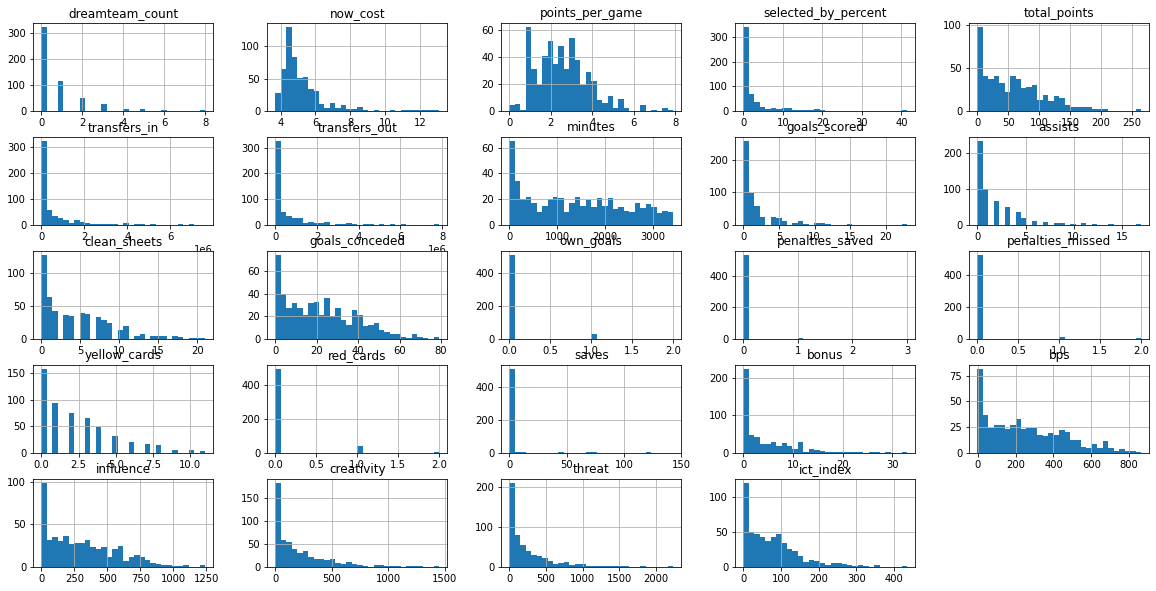

In [18]:
final_df.hist(bins=30, figsize=(20, 10))

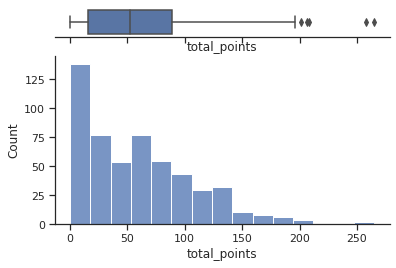

In [19]:
sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x = final_df['total_points'], ax=ax_box)
sns.histplot(x = final_df['total_points'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

From the below figures we can see that Everton had the most players that played at least 1 min with 32 players
Burnley on the other hand had the fewest with 22 players.

Interestingly, teams that finished in the top 5 positions[1] of the league align with the average number of players with at least 1 minute played. With the exception of Spurs which had significantly less with 22 players

This suggests that for a team to finish in a top 5 position, it should ideally have a squad of around 26 players

In [20]:
#Looking at the number of players from each team
final_df['team'].value_counts()

Everton           32
Watford           30
Brentford         29
Newcastle         29
Leeds             29
Norwich           28
Man Utd           28
Leicester         28
Aston Villa       28
Liverpool         27
Man City          26
Arsenal           26
Chelsea           26
Wolves            26
Southampton       25
Brighton          25
West Ham          25
Crystal Palace    24
Spurs             24
Burnley           22
Name: team, dtype: int64

From the below figures, we can see that the top 4 teams in average points per team, match the top 4 teams in the Premiur League table. However, there is a significant drop in the average points per team with more than 10 points difference between Chelsea and Crystal Palace, a difference that is not repeated in all other consecutive rankings.

Considering a 12th place finish, Crystal Palace seem to have overperformed in average points.

In [21]:
#Calculating average total points per team
final_df.groupby('team')['total_points'].mean().sort_values(ascending = False)

team
Man City          87.038462
Liverpool         85.407407
Spurs             78.083333
Chelsea           77.730769
Crystal Palace    67.083333
Arsenal           65.000000
West Ham          64.520000
Wolves            59.038462
Brighton          58.880000
Burnley           58.318182
Leicester         56.000000
Man Utd           54.750000
Aston Villa       54.142857
Southampton       54.120000
Newcastle         51.827586
Brentford         50.586207
Everton           43.031250
Leeds             41.137931
Norwich           39.678571
Watford           37.566667
Name: total_points, dtype: float64

Looking at the numbers below, we can see that the average points per position suggests that a formation that favors the midfield and forward players would bring in more points as the averages for both are higher than the average for defenders. 

It also shows that Goalkeepers had the highest average points

In [22]:
#Calculating average points per position
final_df.groupby('position')['total_points'].mean().sort_values(ascending = False)

position
Goalkeeper    64.857143
Forward       58.479452
Midfielder    58.455696
Defender      57.124324
Name: total_points, dtype: float64

In [23]:
#Defining function to print the highest and lowest performers in a list of categories
def best_worst(variables):
    for var in variables:
        high_player = final_df.player_name[final_df[var] == final_df[var].max()].to_list()[0]
        high_team = final_df.team[final_df[var] == final_df[var].max()].to_list()[0]
        high_var = final_df[var].max()
        low_player = final_df.player_name[final_df[var] == final_df[var].min()].to_list()[0]
        low_team = final_df.team[final_df[var] == final_df[var].min()].to_list()[0]
        low_var = final_df[var].min()
        print('\n')
        print(var)
        print('Highest: {} who plays for {} with {}'.format(high_player,high_team,high_var))
        print('Lowest: {} who plays for {} with {}'.format(low_player,low_team,low_var))

In the below 4 outputs, we can see that even though Man City have the highest average for almost all attributes and stats -apart from Kevin De Bruyne having the highest number of bonus points (33)- no individual Man City player is showing up at a specific area. Given that they won the league [1], it goes to show how strong they were as a team.

On the other hand, Liverpool players seem to dominate in the individual area were players like Mohamed Salah and Trent Alexander-Arnold had a phenomnal season.

Note: For the most part, players that show up as the lowest performers are not the only ones with these stats and there are others who share the same stats. They are showing up simply because they were the ones that came up first in the index.

In [24]:
attributes = final_df.iloc[:,18:24].columns

best_worst(attributes)



bonus
Highest: Kevin De Bruyne who plays for Man City with 33
Lowest: Bernd Leno who plays for Arsenal with 0


bps
Highest: Trent Alexander-Arnold who plays for Liverpool with 864
Lowest: Kaide Gordon who plays for Liverpool with -3


influence
Highest: Mohamed Salah who plays for Liverpool with 1241.0
Lowest: Wesley Moraes who plays for Aston Villa with 0.0


creativity
Highest: Trent Alexander-Arnold who plays for Liverpool with 1449.1
Lowest: Bernd Leno who plays for Arsenal with 0.0


threat
Highest: Mohamed Salah who plays for Liverpool with 2230.0
Lowest: Bernd Leno who plays for Arsenal with 0.0


ict_index
Highest: Mohamed Salah who plays for Liverpool with 434.8
Lowest: Wesley Moraes who plays for Aston Villa with 0.0


In [25]:
final_df.groupby('team', as_index=False)[attributes].mean().sort_values('ict_index', ascending = False)

,team,bonus,bps,influence,creativity,threat,ict_index
11,Man City,7.423077,354.576923,380.938462,331.738462,401.653846,111.500000
10,Liverpool,7.370370,337.407407,379.844444,306.111111,378.925926,106.492593
5,Chelsea,6.346154,316.000000,361.961538,270.730769,307.923077,93.988462
16,Spurs,5.958333,331.041667,382.600000,243.816667,286.875000,91.337500
0,Arsenal,4.923077,273.961538,318.353846,252.550000,297.500000,86.742308
18,West Ham,5.400000,280.760000,352.120000,200.748000,252.440000,80.560000
12,Man Utd,4.535714,258.678571,315.564286,224.189286,235.821429,77.525000
15,Southampton,4.560000,249.440000,309.104000,212.368000,252.080000,77.280000
3,Brighton,5.080000,263.760000,307.888000,229.308000,236.400000,77.228000
6,Crystal Palace,5.208333,285.208333,331.266667,196.216667,239.083333,76.658333


In [26]:
stats = final_df.iloc[:,[0,1,4] + list(range(7,18))].columns

best_worst(stats)



dreamteam_count
Highest: Mohamed Salah who plays for Liverpool with 8
Lowest: Pierre-Emerick Aubameyang who plays for Arsenal with 0


now_cost
Highest: Mohamed Salah who plays for Liverpool with 13.1
Lowest: Konstantinos Tsimikas who plays for Liverpool with 3.7


total_points
Highest: Mohamed Salah who plays for Liverpool with 265
Lowest: Sead Kolasinac who plays for Arsenal with 0


minutes
Highest: David de Gea who plays for Man Utd with 3420
Lowest: Wesley Moraes who plays for Aston Villa with 1


goals_scored
Highest: Mohamed Salah who plays for Liverpool with 23
Lowest: Bernd Leno who plays for Arsenal with 0


assists
Highest: Jarrod Bowen who plays for West Ham with 17
Lowest: Bernd Leno who plays for Arsenal with 0


clean_sheets
Highest: Virgil van Dijk who plays for Liverpool with 21
Lowest: Pablo Marí who plays for Arsenal with 0


goals_conceded
Highest: Illan Meslier who plays for Leeds with 79
Lowest: Wesley Moraes who plays for Aston Villa with 0


own_goals
Highest:

In [27]:
final_df.groupby('team', as_index=False)[stats].mean().sort_values('total_points', ascending = False)

,team,dreamteam_count,now_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves
11,Man City,1.384615,6.323077,87.038462,1442.500000,3.692308,3.115385,8.730769,11.000000,0.000000,0.000000,0.076923,1.615385,0.038462,2.384615
10,Liverpool,1.481481,6.148148,85.407407,1389.666667,3.481481,3.037037,8.333333,10.592593,0.037037,0.000000,0.037037,1.851852,0.037037,3.000000
16,Spurs,1.416667,5.529167,78.083333,1535.416667,2.583333,2.708333,7.416667,17.791667,0.041667,0.000000,0.000000,2.750000,0.041667,4.041667
5,Chelsea,1.346154,5.996154,77.730769,1441.769231,2.884615,2.576923,6.884615,13.961538,0.038462,0.000000,0.038462,2.423077,0.038462,3.230769
6,Crystal Palace,0.666667,5.025000,67.083333,1561.125000,2.083333,1.750000,5.958333,21.083333,0.083333,0.041667,0.083333,2.791667,0.041667,4.166667
0,Arsenal,1.076923,5.284615,65.000000,1430.461538,2.307692,1.846154,5.730769,20.038462,0.038462,0.000000,0.115385,2.346154,0.153846,3.846154
18,West Ham,1.080000,5.060000,64.520000,1501.320000,2.320000,2.320000,3.760000,22.440000,0.080000,0.120000,0.080000,1.880000,0.120000,4.640000
19,Wolves,0.615385,4.969231,59.038462,1441.423077,1.346154,1.230769,5.153846,18.192308,0.038462,0.000000,0.000000,2.230769,0.076923,4.807692
3,Brighton,0.720000,4.872000,58.880000,1458.560000,1.560000,1.480000,4.920000,18.880000,0.000000,0.000000,0.120000,2.720000,0.080000,4.160000
4,Burnley,0.954545,4.827273,58.318182,1643.954545,1.318182,1.409091,4.545455,25.318182,0.090909,0.000000,0.045455,3.045455,0.090909,5.818182


In [28]:
#Function that shows the top 5 performers for each position
def top_5(position):
    top = final_df[final_df['position'] == position][['position', 'team', 'player_name', 'total_points']].sort_values('total_points', ascending = False).head(5)
    print(top)

Again, we see below Liverpool players dominating in the individual scores.

Interestingly, even though we saw before that Defenders had the lowest average points, the top 5 Defenders had a combined sum points that was more than the combined totals for Goalkeepers and Forwards respectively.

In [29]:
top_5('Goalkeeper')

       position       team                player_name  total_points
277  Goalkeeper  Liverpool      Alisson Ramses Becker           176
432  Goalkeeper      Spurs                Hugo Lloris           158
305  Goalkeeper   Man City  Ederson Santana de Moraes           155
531  Goalkeeper     Wolves        José Malheiro de Sá           146
488  Goalkeeper   West Ham           Lukasz Fabianski           136


In [30]:
top_5('Defender')

     position       team                player_name  total_points
283  Defender  Liverpool     Trent Alexander-Arnold           208
304  Defender   Man City  João Pedro Cavaco Cancelo           201
280  Defender  Liverpool           Andrew Robertson           186
275  Defender  Liverpool            Virgil van Dijk           183
271  Defender  Liverpool                 Joel Matip           170


In [31]:
top_5('Midfielder')

       position       team      player_name  total_points
279  Midfielder  Liverpool    Mohamed Salah           265
434  Midfielder      Spurs    Heung-Min Son           258
499  Midfielder   West Ham     Jarrod Bowen           206
299  Midfielder   Man City  Kevin De Bruyne           196
276  Midfielder  Liverpool       Sadio Mané           183


In [32]:
top_5('Forward')

    position       team                          player_name  total_points
433  Forward      Spurs                           Harry Kane           192
345  Forward    Man Utd  Cristiano Ronaldo dos Santos Aveiro           159
382  Forward    Norwich                          Teemu Pukki           142
492  Forward   West Ham                      Michail Antonio           140
56   Forward  Brentford                           Ivan Toney           139


The most interesting correlations to me in the below figure are:
1- There is a positive correlation between transfer_out variable and total points. I expected the correlation to be a negative one as I would have guessed that the player with more points would be removed less. This could be explained by removing the high performing players from a draft when injured or suspended, hence the high number of changes that would accompany such players.
2- now_cost variables seem to only be highly correlated with the threat and goals_scored variables which suggests that the pricing system favors the goal scoring players. Which in turn is in favor of the person creating a draft, because as we saw earlier, the top 5 defenders had more points than all other position apart from midfielders

As first feared, the numerical variables mostly have high correlation which might cause issues when we come to the modeling part of this project.

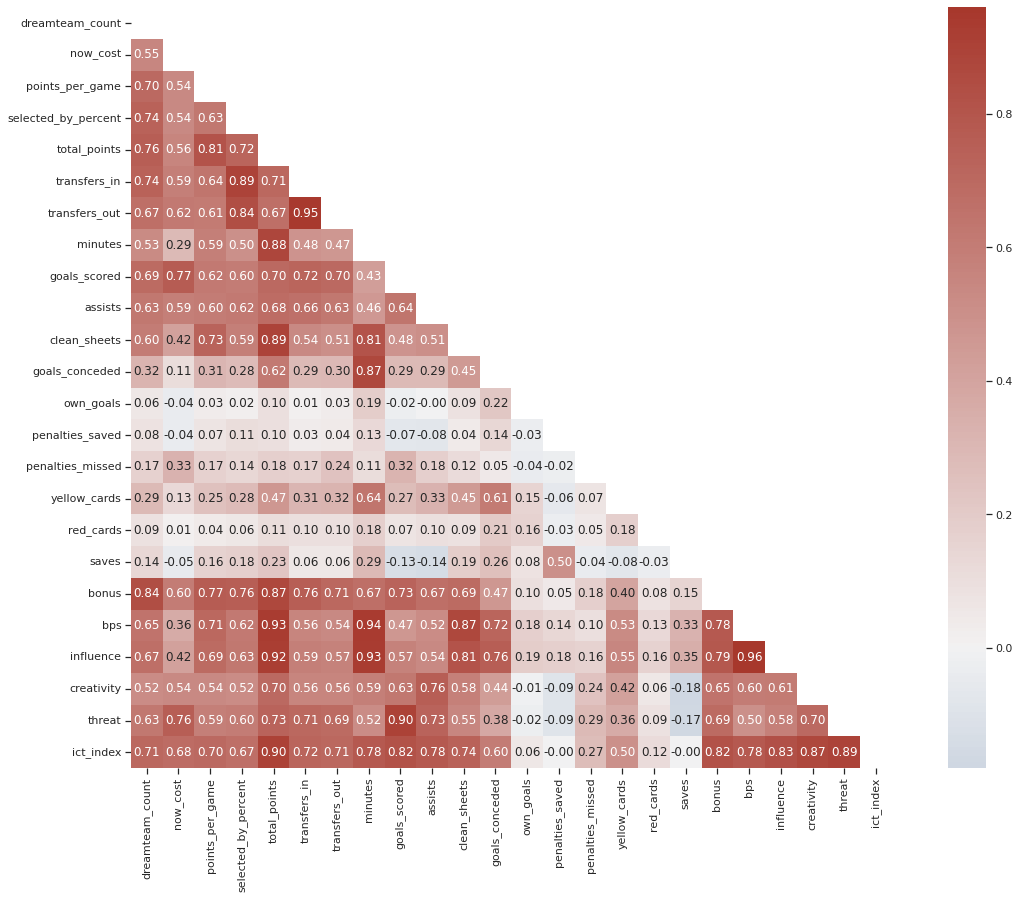

In [33]:
#Plotting the correlation between the numerical variables
corr_mat = final_df.corr().round(2)
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(20, 14))
sns.heatmap(corr_mat, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

plt.show();

In [34]:
#Numerical variable pairs with the highest correlation
corr_mat.unstack().sort_values(ascending=False).drop_duplicates().head(20)

dreamteam_count  dreamteam_count        1.00
bps              influence              0.96
transfers_in     transfers_out          0.95
minutes          bps                    0.94
bps              total_points           0.93
influence        total_points           0.92
threat           goals_scored           0.90
transfers_in     selected_by_percent    0.89
minutes          total_points           0.88
creativity       ict_index              0.87
transfers_out    selected_by_percent    0.84
influence        ict_index              0.83
goals_scored     ict_index              0.82
total_points     points_per_game        0.81
influence        bonus                  0.79
assists          ict_index              0.78
points_per_game  bonus                  0.77
assists          creativity             0.76
ict_index        clean_sheets           0.74
threat           assists                0.73
dtype: float64

# Conclusion
* Midfielders are the most valuable players in the game and make the biggest impact if chosen right
* Forwards are more expensive than defenders because they get more opportunties to score a goal
* Defenders have the potential to score more points than forwards
* The safest bet is to have players from the 4 teams expected to end the season at the top 4 places
* The best formation to start the season with is 4-5-1 formation (4 defenders, 5 midfielders, and 1 forward)

These points are all an outline and best judgment should be used throughout the season. For example, suspended and injured players should be sustituted out for players that are available to play the match instead.

# Next Steps

* Find the players that transferred in our out of a club mid-season and see if their impact can be gauged
* Extract previous seasons' stats to see the players that showed imporvement and the players that had a dip
* Build a prediction model to find the players predicted to perform the best next season

# References

[1] Premiuer League table: https://www.premierleague.com/tables?co=1&se=418&ha=-1